# Classification of Emission Line Galaxies with SDSS & WISE

## Imports

In [184]:
%matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

import pandas as pd
import numpy as np
from collections import Counter

import calc_kcor

Using matplotlib backend: MacOSX


In [4]:
galaxies = pd.read_csv('all_galaxies.csv', header=0)
galaxies

,specobjid,plate,mjd,fiberID,ra,dec,class,subclass,z,oiii_5007_flux,...,neiii_3869_flux,neiii_3869_flux_err,oii_3726_flux,oii_3726_flux_err,oii_3729_flux,oii_3729_flux_err,psfMag_g,psfMagErr_g,psfMag_z,psfMagErr_z
0,341314824635967488,303,51615,608,214.562130,0.891112,GALAXY,STARBURST,0.025945,126.405000,...,12.146350,5.086406,127.380200,8.248718,76.66525,7.681083,17.70347,0.024778,16.82364,0.031593
1,342371730087503872,304,51609,357,214.199610,0.911453,GALAXY,STARFORMING,0.084025,13.265600,...,8.451961,3.367877,32.457920,4.768321,28.56864,4.775732,19.34681,0.024955,17.91849,0.028381
2,341291734891784192,303,51615,524,213.912810,0.993629,GALAXY,STARFORMING,0.187534,19.200360,...,4.401357,2.599555,18.060420,3.727274,39.69848,3.912775,19.53404,0.020845,17.84768,0.024774
3,341270844170856448,303,51615,448,213.554140,1.039509,GALAXY,NaN,0.123470,8.011358,...,3.580941,2.747633,3.064768,3.033958,13.61100,3.078075,19.55610,0.020486,18.00039,0.026711
4,341260673688299520,303,51615,411,213.485670,0.896417,GALAXY,STARBURST,0.053109,53.569820,...,11.705320,3.170118,129.602200,5.513858,149.63810,5.704598,18.80603,0.018145,17.81449,0.031416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,382853275696785408,340,51691,172,198.326920,-2.435843,GALAXY,STARFORMING,0.143855,14.390510,...,4.756250,3.018577,8.401245,3.816117,24.54712,3.751294,19.45848,0.020527,18.05513,0.029754
29996,382845309253871616,340,51990,143,198.509510,-2.619345,GALAXY,STARFORMING,0.145366,27.877710,...,8.490521,3.111003,27.380720,3.708823,34.14178,3.834837,18.88958,0.024242,17.71241,0.024464
29997,906417088359327744,805,52586,246,50.809591,-0.723768,GALAXY,STARBURST,0.139327,45.056640,...,5.032422,1.827658,63.569320,2.399855,77.00873,2.513343,20.48798,0.025762,19.83933,0.064936
29998,906416813481420800,805,52586,245,51.063361,-0.719268,GALAXY,STARBURST,0.058340,125.848600,...,7.535893,2.407882,45.945680,3.398117,61.78020,3.484971,20.92731,0.042072,20.49734,0.120998


# Task 1

In [5]:
galaxies.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'ra', 'dec', 'class',
       'subclass', 'z', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'nii_6584_reqw', 'nii_6584_reqw_err',
       'sii_6717_flux', 'sii_6717_flux_err', 'sii_6731_flux',
       'sii_6731_flux_err', 'oi_6300_flux', 'oi_6300_flux_err', 'h_alpha_reqw',
       'h_alpha_reqw_err', 'neiii_3869_flux', 'neiii_3869_flux_err',
       'oii_3726_flux', 'oii_3726_flux_err', 'oii_3729_flux',
       'oii_3729_flux_err', 'psfMag_g', 'psfMagErr_g', 'psfMag_z',
       'psfMagErr_z'],
      dtype='object')

In [6]:
print(galaxies[['oiii_5007_flux', 'h_alpha_flux', 'h_beta_flux', 'nii_6584_flux', 'nii_6584_reqw', 
       'sii_6717_flux', 'sii_6731_flux', 'oi_6300_flux', 'h_alpha_reqw', 'neiii_3869_flux', 
       'oii_3726_flux', 'oii_3729_flux', 'psfMag_g', 
       'psfMag_z']].describe().to_latex(#'./final_project_report/all_galaxies_describe.tex', 
                                        float_format="{:.1f}".format))

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &  oiii\_5007\_flux &  h\_alpha\_flux &  h\_beta\_flux &  nii\_6584\_flux &  nii\_6584\_reqw &  sii\_6717\_flux &  sii\_6731\_flux &  oi\_6300\_flux &  h\_alpha\_reqw &  neiii\_3869\_flux &  oii\_3726\_flux &  oii\_3729\_flux &  psfMag\_g &  psfMag\_z \\
\midrule
count &         30000.0 &       30000.0 &      30000.0 &        30000.0 &        30000.0 &        30000.0 &        30000.0 &       30000.0 &       30000.0 &          30000.0 &        30000.0 &        30000.0 &   30000.0 &   30000.0 \\
mean  &       4944302.1 &    11734235.7 &    3162240.5 &      2725027.4 &           -9.6 &      2023817.8 &      1556806.3 &      474600.4 &         -30.2 &         513685.6 &      3570560.8 &      4301412.1 &      19.4 &      18.2 \\
std   &     234842102.8 &   411972738.0 &  114506627.0 &     98910315.7 &            8.1 &     66899251.9 &     52323162.8 &    16514262.0 &          52.9 &       20495487.8 &    131961213.9 &    165250949.0 &       0.7 &

## Distribution of the data

In [7]:
Counter(galaxies['class'])

Counter({'GALAXY': 29502, 'QSO': 498})

In [8]:
Counter(galaxies['subclass'])

Counter({'STARBURST': 6820,
         'STARFORMING': 14626,
         nan: 5485,
         'AGN': 1881,
         'BROADLINE': 545,
         'AGN BROADLINE': 304,
         'STARFORMING BROADLINE': 108,
         'STARBURST BROADLINE': 231})

In [9]:
Counter(galaxies.loc[galaxies['class']=='QSO']['subclass'])

Counter({'AGN': 63,
         'STARBURST BROADLINE': 222,
         'AGN BROADLINE': 99,
         'STARFORMING BROADLINE': 22,
         'BROADLINE': 71,
         nan: 9,
         'STARFORMING': 4,
         'STARBURST': 8})

In [10]:
Counter(galaxies.loc[galaxies['class']=='GALAXY']['subclass'])


Counter({'STARBURST': 6812,
         'STARFORMING': 14622,
         nan: 5476,
         'AGN': 1818,
         'BROADLINE': 474,
         'AGN BROADLINE': 205,
         'STARFORMING BROADLINE': 86,
         'STARBURST BROADLINE': 9})

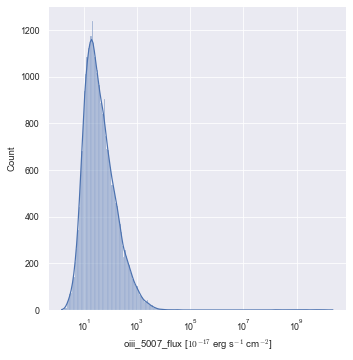

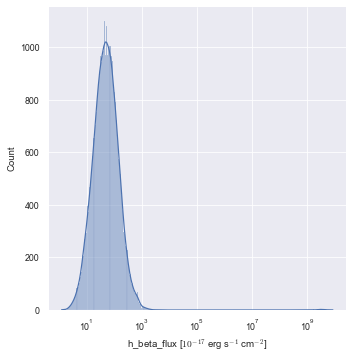

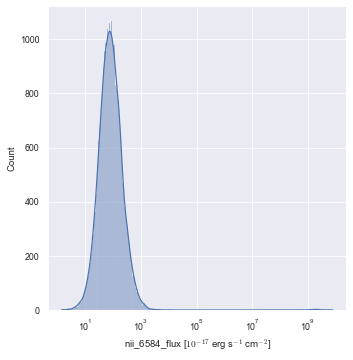

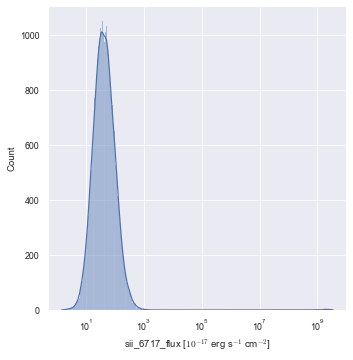

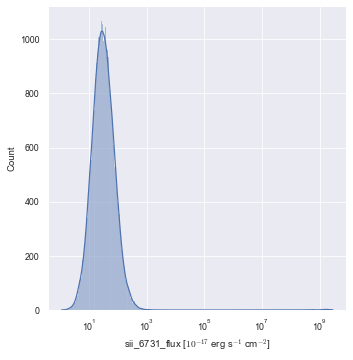

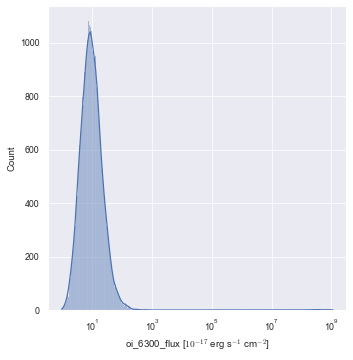

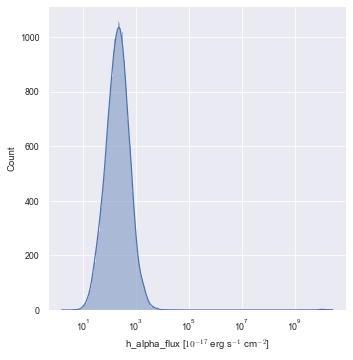

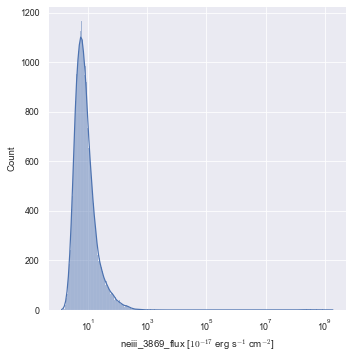

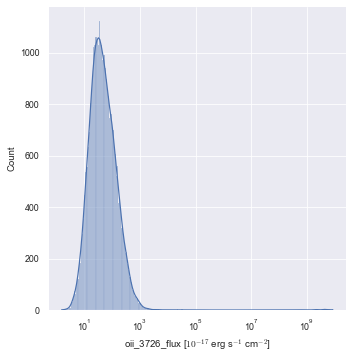

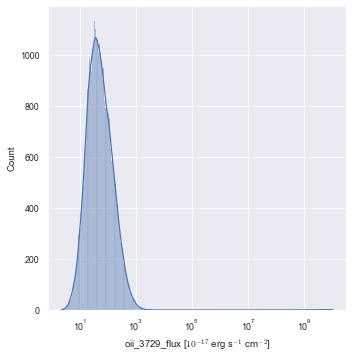

In [11]:
cols = ['oiii_5007_flux', 'h_beta_flux', 'nii_6584_flux', 'sii_6717_flux', 
        'sii_6731_flux','oi_6300_flux', 'h_alpha_flux', 'neiii_3869_flux', 
        'oii_3726_flux', 'oii_3729_flux']

for col in cols:
    sns.displot(data=galaxies, x=col, log_scale=True, kde=True)

    plt.xlabel(col + r' [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$]')

    # plt.savefig('./data_histograms/distr_' + col + '.pdf')

    plt.show()

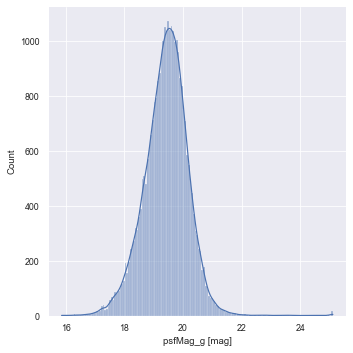

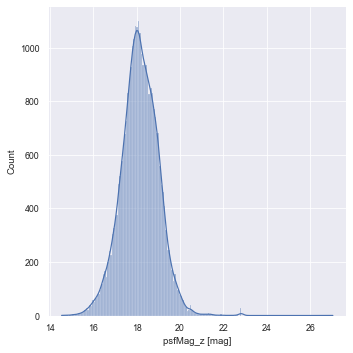

In [12]:
cols = ['psfMag_g', 'psfMag_z']

for col in cols:
    sns.displot(data=galaxies, x=col, log_scale=False, kde=True)

    plt.xlabel(col + r' [mag]')

    # plt.savefig('./data_histograms/distr_' + col + '.pdf')

    plt.show()

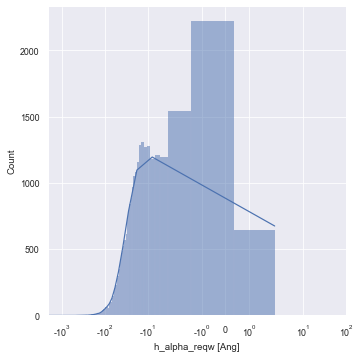

In [13]:
sns.displot(data=galaxies, x='h_alpha_reqw', log_scale=False, kde=True)

plt.xlabel(r'h_alpha_reqw [Ang]')

plt.xscale('symlog')

# plt.savefig('./data_histograms/distr_h_alpha_reqw.pdf')

plt.show()

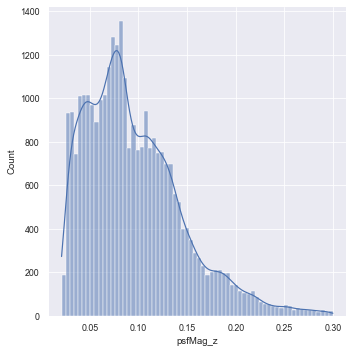

In [14]:
sns.displot(data=galaxies, x='z', log_scale=False, kde=True)

plt.xlabel(col)
# plt.savefig('distr_redshift.pdf')

plt.show()

## BPT Diagram

In [15]:
galaxies.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'ra', 'dec', 'class',
       'subclass', 'z', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'nii_6584_reqw', 'nii_6584_reqw_err',
       'sii_6717_flux', 'sii_6717_flux_err', 'sii_6731_flux',
       'sii_6731_flux_err', 'oi_6300_flux', 'oi_6300_flux_err', 'h_alpha_reqw',
       'h_alpha_reqw_err', 'neiii_3869_flux', 'neiii_3869_flux_err',
       'oii_3726_flux', 'oii_3726_flux_err', 'oii_3729_flux',
       'oii_3729_flux_err', 'psfMag_g', 'psfMagErr_g', 'psfMag_z',
       'psfMagErr_z'],
      dtype='object')

In [16]:
# [NII] / H alpha
galaxies['nii_h_alpha'] = galaxies.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
galaxies['nii_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['nii_h_alpha']), axis=1)

# [OIII] / H beta
galaxies['oiii_h_beta'] = galaxies.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)
galaxies['oiii_h_beta_log'] = galaxies.apply(lambda x: np.log10(x['oiii_h_beta']), axis=1)

# [SII] / H alpha
galaxies['sii6717_h_alpha'] = galaxies.apply(lambda x: x['sii_6717_flux'] / x['h_alpha_flux'], axis=1)
galaxies['sii6717_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['sii6717_h_alpha']), axis=1)

galaxies['sii6731_h_alpha'] = galaxies.apply(lambda x: x['sii_6731_flux'] / x['h_alpha_flux'], axis=1)
galaxies['sii6731_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['sii6731_h_alpha']), axis=1)

# [OIII] / [OI]
galaxies['oi_h_alpha'] = galaxies.apply(lambda x: x['oi_6300_flux'] / x['h_alpha_flux'], axis=1)
galaxies['oi_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['oi_h_alpha']), axis=1)

### BPT Diagram with SDSS Spectral Subclasses

In [17]:
galaxies[['nii_h_alpha_log', 'oiii_h_beta_log']].describe()

,nii_h_alpha_log,oiii_h_beta_log
count,30000.000000,30000.000000
mean,-0.403627,-0.093391
std,0.286310,0.406314
min,-2.252027,-1.866252
25%,-0.540156,-0.416530
50%,-0.419075,-0.126279
75%,-0.235782,0.193592
max,0.720832,1.804436


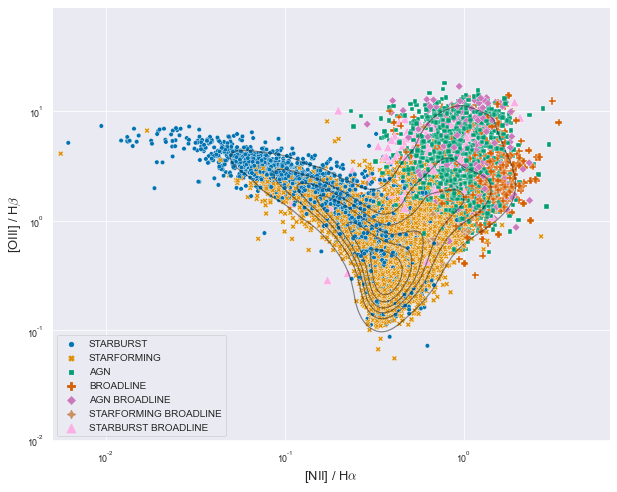

In [18]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=galaxies, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind', 
                hue='subclass', style='subclass', size='subclass', sizes=(80, 20))

sns.kdeplot(data=galaxies, x='nii_h_alpha', y='oiii_h_beta', levels=7, alpha=0.5, 
            cut=2, color='k', log_scale=True)

plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xlim(0.005, 6.55)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('./BPT_Diagrams/BPT_diagram_sdss_subclasses.pdf')

plt.show()

### BPT Function

In [332]:
def plot_BPT(data, x, y, hue, xlabel, ylabel, 
             Kauffman=True, Kewley=True, 
             ylim=(-2.0, 2.0), 
             density=False, 
             save=False, save_name=None):
    
    plt.figure(figsize=(12, 8))

    plt.ylim(ylim)

    sns.scatterplot(data=data, x=x, y=y, palette='colorblind', 
                    hue=hue, style='BPT final', size=hue, sizes=(30, 15))
    if density:
        sns.kdeplot(data=data, x=x, y=y, levels=7, alpha=0.5, cut=2, color='k')

    # ------------------------------------------------------------------------------------------------
    # Kauffman
    if Kauffman:
        x_to_plot = np.linspace(galaxies[x].min(), 0)
        plt.plot(x_to_plot, 0.61 / (x_to_plot - 0.05) + 1.3, label='Kauffman et al. 2003', 
                linewidth=1.5, alpha=0.8, c='k', linestyle='dashdot')

    # ------------------------------------------------------------------------------------------------
    # Kewley
    if Kewley:
        x_to_plot_1 = np.linspace(galaxies[x].min(), 0.4)
        plt.plot(x_to_plot_1, 0.61 / (x_to_plot_1 - 0.47) + 1.19, label='Kewley et al. 2001', 
                linewidth=1.5, alpha=0.8, c='k', linestyle='dashed')

    # ------------------------------------------------------------------------------------------------

    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)

    plt.legend(loc='lower left', fontsize=12)

    if save:
        plt.savefig('./BPT_Diagrams/' + save_name + '.pdf')

    plt.show()

### [NII]/H $\alpha$ vs. [OIII]/H $\beta$

#### Kauffman et al. 2003

In [20]:
def BPT_class_Kauff(oiii_h_beta, nii_h_alpha):
    # second condition is to avoid double lines
    if (np.log10(oiii_h_beta) < 0.61 / (np.log10(nii_h_alpha) - 0.05) + 1.3) and (np.log10(nii_h_alpha) < 0.0):
        return 'Star Forming'
    else:
        return 'AGN'

#### Kewley et al. 2001

In [21]:
def BPT_class_Kew(oiii_h_beta, nii_h_alpha):
    if np.log10(oiii_h_beta) < 0.61 / (np.log10(nii_h_alpha) - 0.47) + 1.19 and np.log10(nii_h_alpha) < 0.4:
        return 'Star Forming'
    else:
        return 'AGN'


In [22]:
galaxies['BPT Kauffman'] = galaxies.apply(lambda x: BPT_class_Kauff(x['oiii_h_beta'], x['nii_h_alpha']), axis=1)
galaxies['BPT Kewley'] = galaxies.apply(lambda x: BPT_class_Kew(x['oiii_h_beta'], x['nii_h_alpha']), axis=1)

In [23]:
def BPT_final_class(row):
    if row['BPT Kauffman'] != row['BPT Kewley']:
        return 'Composite'
    else:  # they are equal
        return row['BPT Kewley']

In [24]:
galaxies['BPT final'] = galaxies.apply(lambda x: BPT_final_class(x), axis=1)
Counter(galaxies['BPT final'])

Counter({'Star Forming': 18988, 'Composite': 5607, 'AGN': 5405})

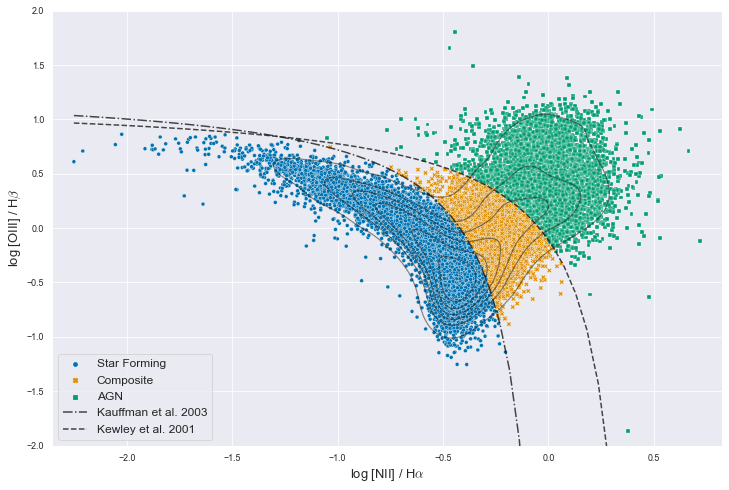

In [25]:
plot_BPT(galaxies, 'nii_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [NII] / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_niiHa_oiiiHb')

### [SII]/H $\alpha$ vs. [OIII]/H $\beta$

In [26]:
galaxies['sii_h_alpha'] = galaxies.apply(lambda x: (x['sii6717_h_alpha'] + x['sii6731_h_alpha']), axis=1)
galaxies['sii_h_alpha_log'] = galaxies.apply(lambda x: np.log10(x['sii_h_alpha']), axis=1)

In [27]:
galaxies[['sii6717_h_alpha', 'sii6731_h_alpha', 'sii_h_alpha']].describe()

,sii6717_h_alpha,sii6731_h_alpha,sii_h_alpha
count,30000.000000,30000.000000,30000.000000
mean,0.233794,0.179553,0.413347
std,0.184194,1.147925,1.171158
min,0.009532,0.005154,0.014686
25%,0.160844,0.116567,0.280238
50%,0.195671,0.140082,0.337034
75%,0.249661,0.179478,0.429762
max,18.906817,179.478185,179.638533


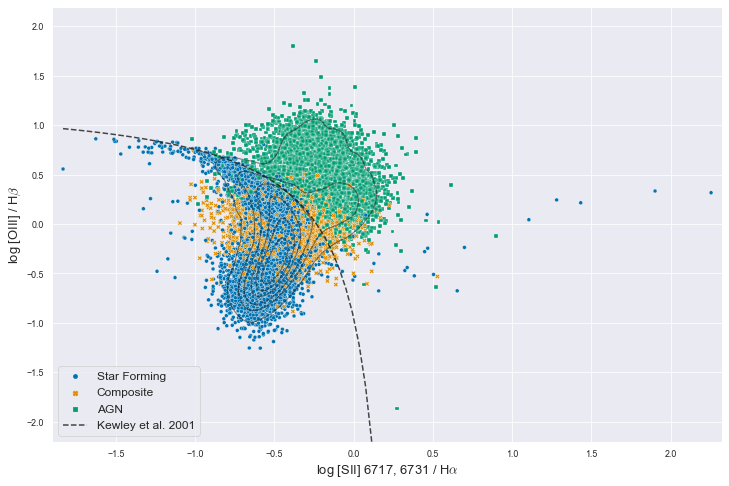

In [28]:
plt.figure(figsize=(12, 8))

plt.ylim(-2.2, 2.2)

sns.scatterplot(data=galaxies, x='sii_h_alpha_log', y='oiii_h_beta_log', palette='colorblind', 
                    hue='BPT final', style='BPT final', size='BPT final', sizes=(30, 15))

sns.kdeplot(data=galaxies, x='sii_h_alpha_log', y='oiii_h_beta_log', levels=7, alpha=0.5, cut=2, color='k')

# ------------------------------------------------------------------------------------------------
# Kewley
x_to_plot_1 = np.linspace(galaxies['sii_h_alpha_log'].min(), 0.2)
plt.plot(x_to_plot_1, 0.72 / (x_to_plot_1 - 0.32) + 1.30, label='Kewley et al. 2001', 
                linewidth=1.5, alpha=0.8, c='k', linestyle='dashed')

# ------------------------------------------------------------------------------------------------

plt.xlabel(r'log [SII] 6717, 6731 / H$\alpha$', fontsize=13)
plt.ylabel(r'log [OIII] / H$\beta$', fontsize=13)

plt.legend(loc='lower left', fontsize=12)

# plt.savefig('./BPT_Diagrams/BPT_sii67176731Ha_oiiiHb.pdf')

plt.show()

### [OIII]/H $\beta$ vs [OI]/H $\alpha$

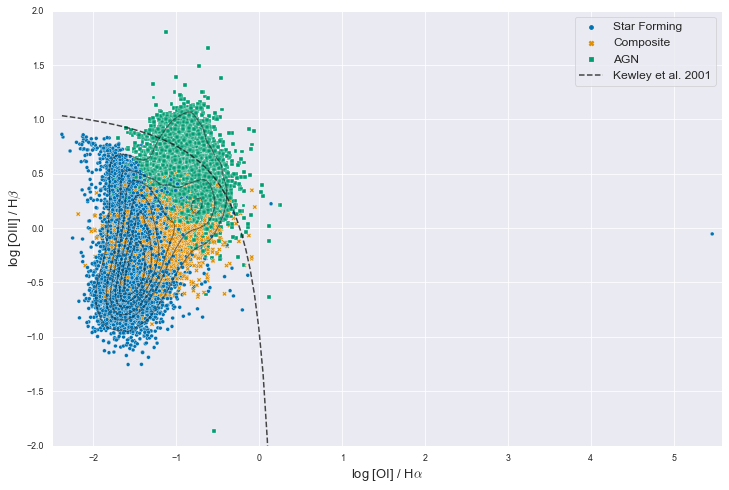

In [29]:
plt.figure(figsize=(12, 8))

plt.ylim(-2.0, 2.0)

sns.scatterplot(data=galaxies, x='oi_h_alpha_log', y='oiii_h_beta_log', palette='colorblind', 
                    hue='BPT final', style='BPT final', size='BPT final', sizes=(30, 15))

sns.kdeplot(data=galaxies, x='oi_h_alpha_log', y='oiii_h_beta_log', levels=7, alpha=0.5, cut=2, color='k')

# ------------------------------------------------------------------------------------------------
# Kewley
x_to_plot_1 = np.linspace(galaxies['oi_h_alpha_log'].min(), 0.15)
plt.plot(x_to_plot_1, 0.72 / (x_to_plot_1 - 0.32) + 1.30, label='Kewley et al. 2001', 
                linewidth=1.5, alpha=0.8, c='k', linestyle='dashed')

# ------------------------------------------------------------------------------------------------

plt.xlabel(r'log [OI] / H$\alpha$', fontsize=13)
plt.ylabel(r'log [OIII] / H$\beta$', fontsize=13)

plt.legend(loc='upper right', fontsize=12)

# plt.savefig('./BPT_Diagrams/BPT_oiHa_oiiiHb.pdf')

plt.show()

## WHAN Diagram

In [30]:
galaxies['h_alpha_reqw_log'] = galaxies.apply(lambda x: np.log10(x['h_alpha_reqw']), axis=1)
galaxies['h_alpha_reqw_abs'] = galaxies.apply(lambda x: np.abs(x['h_alpha_reqw']), axis=1)

galaxies['nii_6584_reqw_log'] = galaxies.apply(lambda x: np.log10(x['nii_6584_reqw']), axis=1)
galaxies['nii_6584_reqw_abs'] = galaxies.apply(lambda x: np.abs(x['nii_6584_reqw']), axis=1)

/Users/nicolasgalvarinoguerravaras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/Users/nicolasgalvarinoguerravaras/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [31]:
galaxies[['h_alpha_reqw', 'h_alpha_reqw_abs', 'h_alpha_reqw_log']].describe()

,h_alpha_reqw,h_alpha_reqw_abs,h_alpha_reqw_log
count,30000.000000,30000.000000,1153.000000
mean,-30.152591,30.187486,-0.504611
std,52.909127,52.889224,0.470639
min,-1986.580000,0.000136,-3.694147
25%,-36.213280,7.980090,-0.693833
50%,-18.964895,18.964895,-0.400315
75%,-7.980090,36.213280,-0.181766
max,2.169645,1986.580000,0.336389


In [32]:
galaxies[galaxies['h_alpha_reqw'] > 0].describe()

,specobjid,plate,mjd,fiberID,ra,dec,z,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,...,sii6731_h_alpha,sii6731_h_alpha_log,oi_h_alpha,oi_h_alpha_log,sii_h_alpha,sii_h_alpha_log,h_alpha_reqw_log,h_alpha_reqw_abs,nii_6584_reqw_log,nii_6584_reqw_abs
count,1.153000e+03,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,...,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1.000000,1153.000000
mean,5.754079e+17,510.983521,52049.748482,332.972246,160.120592,19.159050,0.080499,22.239857,3.550427,38.726917,...,0.349222,-0.505858,0.217835,-0.718674,0.858917,-0.096862,-0.504611,0.453973,-0.966863,1.343137
std,2.069836e+17,183.837995,295.029635,181.251894,80.761072,25.042578,0.035121,16.758054,1.653545,44.285295,...,0.199034,0.206711,0.135303,0.215466,0.391074,0.163590,0.470639,0.318406,NaN,0.564212
min,2.996054e+17,266.000000,51602.000000,1.000000,0.376399,-11.060015,0.023988,2.629371,1.255746,1.559471,...,0.005154,-2.287842,0.008380,-2.076735,0.014686,-1.833105,-3.694147,0.000202,-0.966863,0.024197
25%,4.346738e+17,386.000000,51877.000000,179.000000,126.509220,0.067765,0.053559,11.188230,2.628704,20.783420,...,0.235919,-0.627237,0.137482,-0.861754,0.638016,-0.195168,-0.693833,0.202379,-0.966863,0.991839
50%,5.293038e+17,470.000000,51990.000000,345.000000,163.608700,2.915731,0.075493,17.844200,3.267625,30.690840,...,0.315197,-0.501418,0.187853,-0.726181,0.799132,-0.097382,-0.400315,0.397818,-0.966863,1.275536
75%,6.902910e+17,613.000000,52254.000000,493.000000,216.398290,46.281958,0.103251,27.555390,4.092714,46.507060,...,0.419303,-0.377472,0.260043,-0.584955,1.004748,0.002057,-0.181766,0.658012,-0.966863,1.653754
max,1.750939e+18,1555.000000,54524.000000,640.000000,359.973920,67.345996,0.219225,173.368400,35.142630,1262.027000,...,3.119024,0.494019,1.766393,0.247087,7.930770,0.899315,0.336389,2.169645,-0.966863,5.741510


In [33]:
galaxies[['h_alpha_reqw_abs', 'nii_6584_reqw_abs']].describe()

,h_alpha_reqw_abs,nii_6584_reqw_abs
count,30000.000000,30000.000000
mean,30.187486,9.599064
std,52.889224,8.089470
min,0.000136,0.020342
25%,7.980090,4.373582
50%,18.964895,7.494151
75%,36.213280,12.351745
max,1986.580000,170.123400


In [34]:
def whan_label(nii_h_alpha_log, nii_6584_reqw, h_alpha_reqw):
    if (h_alpha_reqw < 0.5) and (nii_6584_reqw < 0.5):
        return 'Passive'
    elif (nii_h_alpha_log < -0.4) and (h_alpha_reqw > 3):
        return 'Star Forming'
    elif (nii_h_alpha_log > -0.4) and (h_alpha_reqw > 6):
        return 'Seyfert'
    elif (nii_h_alpha_log > -0.4) and (h_alpha_reqw > 3) and (h_alpha_reqw < 6):
        return 'Weak AGN'
    elif (h_alpha_reqw < 3):
        return 'RG'

In [35]:
galaxies['WHAN label'] = galaxies.apply(lambda x: whan_label(x['nii_h_alpha_log'], x['nii_6584_reqw_abs'], 
                                                             x['h_alpha_reqw_abs']), axis=1)

In [36]:
Counter(galaxies['WHAN label'])

Counter({'Seyfert': 8031,
         'Star Forming': 15995,
         'RG': 4181,
         'Weak AGN': 1777,
         'Passive': 16})

In [37]:
gals_eqw = galaxies.loc[((galaxies['h_alpha_reqw'] <= 0) & (galaxies['nii_6584_reqw'] <= 0))]

In [38]:
Counter(gals_eqw['WHAN label'])

Counter({'Seyfert': 8030,
         'Star Forming': 15976,
         'RG': 3039,
         'Weak AGN': 1776,
         'Passive': 5})

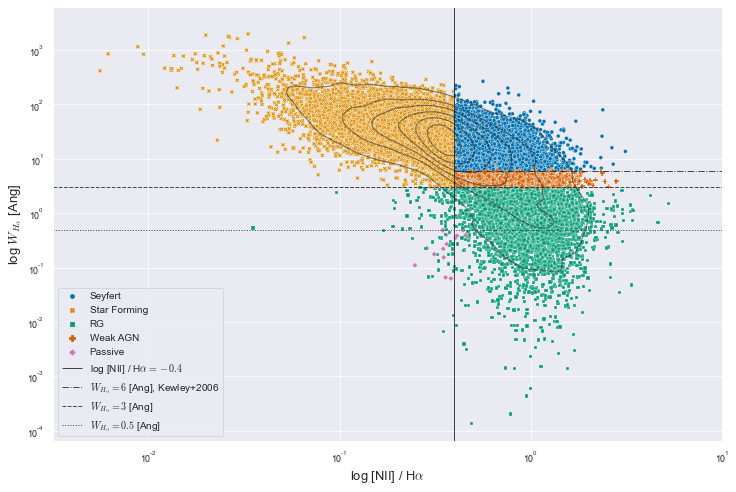

In [39]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', palette='colorblind', 
                hue='WHAN label', style='WHAN label', size='WHAN label', sizes=(30, 15))

sns.kdeplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', levels=7, 
            alpha=0.5, cut=2, color='k', log_scale=True)

plt.ylim(10**(-4.2), 10**(3.8))
plt.xlim(10**(-2.5), 10)

plt.vlines(10**(-0.4), 10**(-4.2), 10**(3.8), linewidth=1.0, alpha=0.8, colors='k', linestyle='solid', 
           label=r'log [NII] / H$\alpha = -0.4$')
plt.hlines(6, 10**(-0.4), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='dashdot', 
           label=r'$W_{H_{\alpha}} = 6$ [Ang], Kewley+2006')
plt.hlines(3, 10**(-2.5), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='dashed', 
           label=r'$W_{H_{\alpha}} = 3$ [Ang]')
plt.hlines(0.5, 10**(-2.5), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='dotted', 
           label=r'$W_{H_{\alpha}} = 0.5$ [Ang]')

plt.xlabel(r'log [NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'log $W_{H_{\alpha}}$ [Ang]', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

plt.savefig('./WHAN_diagrams/WHAN_diagram_whan_label.pdf')

plt.show()

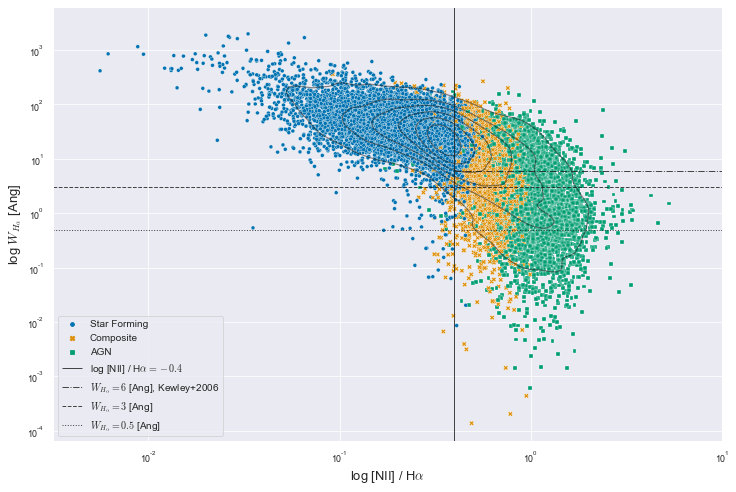

In [40]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', palette='colorblind', 
                hue='BPT final', style='BPT final', size='BPT final', sizes=(30, 15))

sns.kdeplot(data=galaxies, x='nii_h_alpha', y='h_alpha_reqw_abs', levels=7, 
            alpha=0.5, cut=2, color='k', log_scale=True)

plt.ylim(10**(-4.2), 10**(3.8))
plt.xlim(10**(-2.5), 10)

plt.vlines(10**(-0.4), 10**(-4.2), 10**(3.8), linewidth=1.0, alpha=0.8, colors='k', linestyle='solid', 
           label=r'log [NII] / H$\alpha = -0.4$')
plt.hlines(6, 10**(-0.4), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='dashdot', 
           label=r'$W_{H_{\alpha}} = 6$ [Ang], Kewley+2006')
plt.hlines(3, 10**(-2.5), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='dashed', 
           label=r'$W_{H_{\alpha}} = 3$ [Ang]')
plt.hlines(0.5, 10**(-2.5), 10, linewidth=1.0, alpha=0.8, colors='k', linestyle='dotted', 
           label=r'$W_{H_{\alpha}} = 0.5$ [Ang]')

plt.xlabel(r'log [NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'log $W_{H_{\alpha}}$ [Ang]', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

plt.savefig('./WHAN_diagrams/WHAN_diagram.pdf')

plt.show()

### Pie Charts

In [41]:
Counter(galaxies['BPT final'])

Counter({'Star Forming': 18988, 'Composite': 5607, 'AGN': 5405})

In [42]:
Counter(galaxies['WHAN label'])

Counter({'Seyfert': 8031,
         'Star Forming': 15995,
         'RG': 4181,
         'Weak AGN': 1777,
         'Passive': 16})

In [43]:
Counter(galaxies.loc[galaxies['WHAN label']=='Seyfert']['BPT final'])

Counter({'Star Forming': 2924, 'Composite': 3237, 'AGN': 1870})

In [45]:
Counter(galaxies.loc[galaxies['BPT final']=='AGN']['WHAN label'])

Counter({'Seyfert': 1870, 'RG': 2878, 'Weak AGN': 615, 'Star Forming': 42})

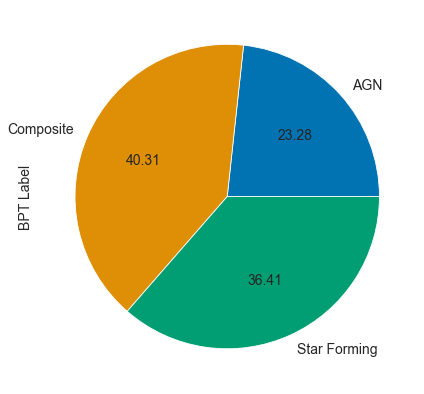

In [47]:
plt.figure(figsize=(7, 7))

galaxies.loc[galaxies['WHAN label']=='Seyfert'].groupby('BPT final').size().plot(kind='pie', autopct='%.2f', 
                                                                                 textprops={'fontsize': 14}, 
                                                                                 colors=['#0173b2', '#de8f05', '#029e73'])

plt.ylabel('BPT Label', fontsize=14)

# plt.savefig('./WHAN_diagrams/seyferts_bpt_label_pie.pdf')

plt.show()

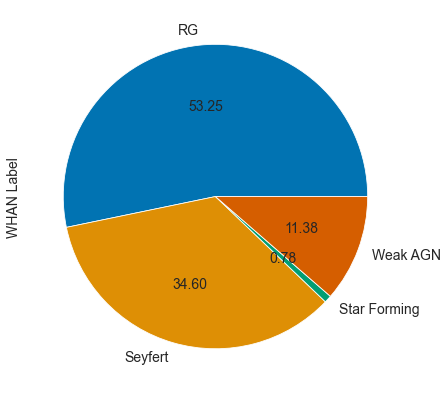

In [48]:
plt.figure(figsize=(7, 7))

galaxies.loc[galaxies['BPT final']=='AGN'].groupby('WHAN label').size().plot(kind='pie', autopct='%.2f', 
                                                                                 textprops={'fontsize': 14}, 
                                                                                 colors=['#0173b2', '#de8f05', '#029e73', '#d55e00'])

plt.ylabel('WHAN Label', fontsize=14)

# plt.savefig('./WHAN_diagrams/agn_whan_label_pie.pdf')

plt.show()

In [100]:
# galaxies.to_csv('./all_galaxies_after.csv', index=False)

# Task 2

In [69]:
# [NeIII] / [OII]
galaxies['neiii_oii'] = galaxies.apply(lambda x: x['neiii_3869_flux'] / (x['oii_3726_flux'] + x['oii_3729_flux']), axis=1)
galaxies['neiii_oii_log'] = galaxies.apply(lambda x: np.log10(x['neiii_oii']), axis=1)

## Redshift k-Correction

In [160]:
galaxies['g_z_color'] = galaxies['psfMag_g'] - galaxies['psfMag_z']

In [161]:
galaxies['z_kcorr'] = galaxies.apply(lambda x: calc_kcor.calc_kcor('z', x['z'], 'g - z', x['g_z_color']), axis=1)
galaxies['g_kcorr'] = galaxies.apply(lambda x: calc_kcor.calc_kcor('g', x['z'], 'g - z', x['g_z_color']), axis=1)

In [204]:
galaxies['g_z_color_kcorr'] = galaxies.apply(lambda x: x['g_z_color'] - (x['g_kcorr'] - x['z_kcorr']), axis=1)

In [205]:
galaxies[['g_z_color', 'g_z_color_kcorr']].describe()

,g_z_color,g_z_color_kcorr
count,30000.000000,30000.000000
mean,1.273670,1.129664
std,0.499523,1.520064
min,-7.216440,-213.085021
25%,0.930840,0.872643
50%,1.331655,1.180013
75%,1.633300,1.417941
max,7.332670,61.794266


## TBT Label

In [206]:
def TBT_label(g_z_color_kcorr, neiii_oii_log):
    if g_z_color_kcorr >= - 1.2 * neiii_oii_log - 0.4:
        return 'AGN'
    else:
        return 'Star Forming'

In [207]:
galaxies['TBT label'] = galaxies.apply(lambda x: TBT_label(x['g_z_color_kcorr'], x['neiii_oii_log']), axis=1)

In [208]:
Counter(galaxies['TBT label'])

Counter({'Star Forming': 11575, 'AGN': 18425})

In [209]:
Counter(galaxies['BPT final'])

Counter({'Star Forming': 18988, 'Composite': 5607, 'AGN': 5405})

## Defining Sub-Sample

In [210]:
sub_gals = galaxies.loc[(galaxies['oii_3729_flux'] / galaxies['oii_3729_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['oii_3726_flux'] / sub_gals['oii_3726_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['oiii_5007_flux'] / sub_gals['oiii_5007_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['h_alpha_flux'] / sub_gals['h_alpha_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['h_beta_flux'] / sub_gals['h_beta_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['nii_6584_flux'] / sub_gals['nii_6584_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['neiii_3869_flux'] / sub_gals['neiii_3869_flux_err']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['psfMag_g'] / sub_gals['psfMagErr_g']) >= 5]
sub_gals = sub_gals.loc[(sub_gals['psfMag_z'] / sub_gals['psfMagErr_z']) >= 5]
sub_gals

,specobjid,plate,mjd,fiberID,ra,dec,class,subclass,z,oiii_5007_flux,...,WHAN label,neiii_oii,neiii_oii_log,g_z_color,g_z_color_zkcorr,g_z_color_gkcorr,TBT label,z_kcorr,g_kcorr,g_z_color_kcorr
27,342335995959601152,304,51609,227,214.558560,-1.046196,GALAXY,STARBURST,0.082107,396.0032,...,Star Forming,0.048180,-1.317135,0.49498,-0.032621,-0.010619,Star Forming,-0.032621,-0.010619,0.472978
28,342329954484119552,304,51957,205,214.558560,-1.046196,GALAXY,STARBURST,0.082111,381.6267,...,Star Forming,0.074998,-1.124950,0.49498,-0.032624,-0.010622,Star Forming,-0.032624,-0.010622,0.472979
37,343575420509120512,305,51613,640,217.276250,0.964188,GALAXY,STARBURST,0.036894,379.5113,...,Star Forming,0.077934,-1.108273,0.74138,0.000045,0.034175,Star Forming,0.000045,0.034175,0.707250
39,343551231253309440,305,51613,552,216.554090,0.860587,GALAXY,AGN,0.031821,206.1960,...,RG,0.115641,-0.936887,0.93713,0.005312,0.046735,AGN,0.005312,0.046735,0.895708
49,341263147589462016,303,51615,420,213.246830,0.921184,GALAXY,AGN,0.052877,2137.1880,...,Seyfert,0.286753,-0.542493,1.34470,0.013627,0.106499,AGN,0.013627,0.106499,1.251829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29972,1024643447019038720,910,52377,271,201.485890,-2.495436,GALAXY,STARBURST,0.029977,920.1729,...,Star Forming,0.045253,-1.344353,0.38002,-0.002286,0.022291,Star Forming,-0.002286,0.022291,0.355443
29974,1025779243352614912,911,52426,307,201.962170,-2.405015,QSO,AGN BROADLINE,0.070474,986.3455,...,Seyfert,0.237555,-0.624235,1.30980,0.009835,0.124079,AGN,0.009835,0.124079,1.195556
29977,905294207076296704,804,52286,257,49.137664,-0.676020,GALAXY,STARBURST,0.067401,140.4042,...,Star Forming,0.063981,-1.193947,0.47598,-0.021953,0.003031,Star Forming,-0.021953,0.003031,0.450996
29985,905310699750713344,804,52286,317,48.249682,0.102643,GALAXY,STARBURST,0.029254,334.1367,...,Star Forming,0.144517,-0.840081,0.17298,-0.001633,0.030913,Star Forming,-0.001633,0.030913,0.140434


In [211]:
Counter(sub_gals['BPT final'])

Counter({'Star Forming': 2263, 'AGN': 1104, 'Composite': 321})

In [212]:
sub_gals[['psfMag_g', 'psfMagErr_g', 'psfMag_z', 'psfMagErr_z']].describe()

,psfMag_g,psfMagErr_g,psfMag_z,psfMagErr_z
count,3688.000000,3688.000000,3688.000000,3688.000000
mean,19.058346,0.028429,18.201214,0.045630
std,0.731414,0.069912,0.925545,0.106745
min,15.864070,0.009314,14.547840,0.010401
25%,18.616470,0.017560,17.590500,0.023283
50%,19.090235,0.020792,18.228280,0.030859
75%,19.525102,0.024625,18.851827,0.043627
max,24.989800,1.784446,22.826890,3.271224


In [191]:
sub_gals.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'ra', 'dec', 'class',
       'subclass', 'z', 'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'nii_6584_reqw', 'nii_6584_reqw_err',
       'sii_6717_flux', 'sii_6717_flux_err', 'sii_6731_flux',
       'sii_6731_flux_err', 'oi_6300_flux', 'oi_6300_flux_err', 'h_alpha_reqw',
       'h_alpha_reqw_err', 'neiii_3869_flux', 'neiii_3869_flux_err',
       'oii_3726_flux', 'oii_3726_flux_err', 'oii_3729_flux',
       'oii_3729_flux_err', 'psfMag_g', 'psfMagErr_g', 'psfMag_z',
       'psfMagErr_z', 'nii_h_alpha', 'nii_h_alpha_log', 'oiii_h_beta',
       'oiii_h_beta_log', 'sii6717_h_alpha', 'sii6717_h_alpha_log',
       'sii6731_h_alpha', 'sii6731_h_alpha_log', 'oi_h_alpha',
       'oi_h_alpha_log', 'BPT Kauffman', 'BPT Kewley', 'BPT final',
       'sii_h_alpha', 'sii_h_alpha_log', 'h_alpha_reqw_log',
       'h_alpha_reqw_abs', 'nii_6584

In [192]:
print(sub_gals[['h_alpha_flux', 'h_beta_flux', 'neiii_3869_flux', 'oii_3726_flux', 'oii_3729_flux', 
                'g_z_color', 'g_z_color_kcorr']].describe().to_latex())#'./final_project_report/TBT_subsample_describe.tex', 
                                                   # float_format="{:.2f}".format))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  h\_alpha\_flux &   h\_beta\_flux &  neiii\_3869\_flux &  oii\_3726\_flux &  oii\_3729\_flux &    g\_z\_color &  g\_z\_color\_kcorr \\
\midrule
count &  3.688000e+03 &  3.688000e+03 &     3.688000e+03 &   3.688000e+03 &   3.688000e+03 &  3688.000000 &      3688.000000 \\
mean  &  2.319929e+07 &  6.894441e+06 &     1.503682e+06 &   8.029934e+06 &   1.042029e+07 &     0.857131 &        -0.756573 \\
std   &  7.247640e+08 &  2.150357e+08 &     4.614261e+07 &   2.435408e+08 &   3.169249e+08 &     0.586440 &         1.150712 \\
min   &  3.282023e+01 &  8.101764e+00 &     7.601961e+00 &   1.618221e+01 &   1.644357e+01 &    -2.364340 &       -61.794266 \\
25\%   &  3.427278e+02 &  9.145030e+01 &     2.063573e+01 &   1.044348e+02 &   1.089818e+02 &     0.425953 &        -1.205880 \\
50\%   &  6.028974e+02 &  1.643201e+02 &     3.169249e+01 &   1.991156e+02 &   2.150147e+02 &     0.730505 &        -0.688858 \\
75\%   &  1.016921e+03 &  2.815236e+02 &     5

## Histograms

In [195]:
sns.displot(data=sub_gals, x='g_z_color', log_scale=False, kde=True)

plt.xlabel(r'$g-z$ Color')

# plt.savefig('./data_histograms/distr_g_z_color.pdf')

plt.show()

In [213]:
sns.displot(data=sub_gals, x='g_z_color_gkcorr', log_scale=False, kde=True)

plt.xlabel(r'$g-z$ $k$-Corrected Color')

# plt.savefig('./data_histograms/distr_g_z_color_kcorr.pdf')

plt.show()

## Inspecting Labels

In [254]:
sub_gals.shape

(3688, 66)

In [214]:
Counter(sub_gals['BPT final'])

Counter({'Star Forming': 2263, 'AGN': 1104, 'Composite': 321})

In [215]:
for i in Counter(sub_gals['BPT final']):
    print(i, Counter(sub_gals['BPT final'])[i], Counter(sub_gals['BPT final'])[i] * 100 / sub_gals.shape[0])

Star Forming 2263 61.36117136659436
AGN 1104 29.934924078091107
Composite 321 8.703904555314534


In [216]:
Counter(sub_gals['TBT label'])

Counter({'Star Forming': 2252, 'AGN': 1436})

In [217]:
for i in Counter(sub_gals['TBT label']):
    print(i, Counter(sub_gals['TBT label'])[i], Counter(sub_gals['TBT label'])[i] * 100 / sub_gals.shape[0])

Star Forming 2252 61.06290672451193
AGN 1436 38.93709327548807


## BPT Diagram

In [333]:
plot_BPT(sub_gals, 'nii_h_alpha_log', 'oiii_h_beta_log', 'BPT final', 
         r'log [NII] / H$\alpha$', r'log [OIII] / H$\beta$', 
         Kauffman=True, Kewley=True, density=True)#, save=True, save_name='BPT_sub_niiHa_oiiiHb')

## TBT Diagram

In [239]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(5, 10))

ax0.scatter(sub_gals[sub_gals['BPT final']=='AGN']['neiii_oii_log'], 
            sub_gals[sub_gals['BPT final']=='AGN']['g_z_color_kcorr'], 
            marker='s', s=22, c='#029e73', edgecolor='white', 
            label='AGN', alpha=0.65)
sns.kdeplot(data=sub_gals[sub_gals['BPT final']=='AGN'], 
            x='neiii_oii_log', y='g_z_color_kcorr', levels=4, 
            alpha=0.5, cut=2, color='k', log_scale=False, ax=ax0)

ax1.scatter(sub_gals[sub_gals['BPT final']=='Composite']['neiii_oii_log'], 
            sub_gals[sub_gals['BPT final']=='Composite']['g_z_color_kcorr'], 
            marker='X', s=27, c='#de8f05', edgecolor='white', 
            label='Composite', alpha=0.8)
sns.kdeplot(data=sub_gals[sub_gals['BPT final']=='Composite'], 
            x='neiii_oii_log', y='g_z_color_kcorr', levels=4, 
            alpha=0.5, cut=2, color='k', log_scale=False, ax=ax1)

ax2.scatter(sub_gals[sub_gals['BPT final']=='Star Forming']['neiii_oii_log'], 
            sub_gals[sub_gals['BPT final']=='Star Forming']['g_z_color_kcorr'], 
            marker='o', s=27, c='#0173b2', edgecolor='white', 
            label='Star Forming', alpha=0.65)
sns.kdeplot(data=sub_gals[sub_gals['BPT final']=='Star Forming'], 
            x='neiii_oii_log', y='g_z_color_kcorr', levels=4, 
            alpha=0.5, cut=2, color='k', log_scale=False, ax=ax2)

x_to_plot = np.linspace(10**(-2.7), 10**(0.5), 50)
ax0.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot')
ax1.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot')
ax2.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot')

plt.xlabel(r'log [NeIII] / [OII]', fontsize=11)

for ax in [ax0, ax1, ax2]:
    ax.set_ylabel(r'$^0$(g-z)', fontsize=11)
    ax.set_ylim(-3.5, 3.5)
    ax.set_xlim(-2.2, 0.3)
    ax.legend()

# plt.savefig('TBT_diagrams/TBT_subplots.pdf')

plt.show()

In [260]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sub_gals, x='neiii_oii_log', y='g_z_color_kcorr', palette='colorblind', 
                hue='BPT final', style='BPT final', size='BPT final', sizes=(30, 15))

sns.kdeplot(data=sub_gals, x='neiii_oii_log', y='g_z_color_kcorr', levels=5, 
            alpha=0.5, cut=2, color='k', log_scale=False)

x_to_plot = np.linspace(10**(-2.7), 10**(0.5), 50)
plt.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot', label='TBT 2011')

plt.ylim(-1.5, 2.5)
plt.xlim(-2.2, 0.3)

plt.xlabel(r'log [NeIII] / [OII]', fontsize=11)
plt.ylabel(r'$^0$(g-z)', fontsize=11)

plt.legend(loc='upper right', fontsize=10)

# plt.savefig('./TBT_diagrams/TBT_full_subsample.pdf')

plt.show()

In [228]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sub_gals, x='neiii_oii_log', y='g_z_color_kcorr', palette='colorblind', 
                hue='TBT label', style='TBT label', size='TBT label', sizes=(30, 15))

sns.kdeplot(data=sub_gals, #.loc[((sub_gals['g_z_color_gkcorr'] >= -1.0) & (sub_gals['g_z_color_gkcorr'] <= 2.5))], 
            x='neiii_oii_log', y='g_z_color_kcorr', levels=5, 
            alpha=0.5, cut=2, color='k', log_scale=False)

x_to_plot = np.linspace(10**(-2.7), 10**(0.5), 50)
plt.plot(np.log10(x_to_plot), - 1.2 * np.log10(x_to_plot) - 0.4, 
         linewidth=1.2, alpha=0.8, c='k', linestyle='dashdot', label='TBT 2011')

plt.ylim(-2.5, 2.5)
plt.xlim(-2.2, 0.3)

plt.xlabel(r'log [NeIII] / [OII]', fontsize=11)
plt.ylabel(r'$^0$(g-z)', fontsize=11)

plt.legend(loc='upper right', fontsize=10)

# plt.savefig('./TBT_diagrams/TBT_full_subsample_tbt_label.pdf')

plt.show()

### Pie Charts

In [257]:
Counter(sub_gals.loc[sub_gals['BPT final']=='AGN']['TBT label'])

Counter({'AGN': 1102, 'Star Forming': 2})

In [258]:
Counter(sub_gals.loc[sub_gals['TBT label']=='AGN']['BPT final'])

Counter({'AGN': 1102, 'Composite': 247, 'Star Forming': 87})

In [251]:
plt.figure(figsize=(7, 7))

galaxies.loc[galaxies['BPT final']=='AGN'].groupby('TBT label').size().plot(kind='pie', autopct='%.2f', labels=None, 
                                                                            textprops={'fontsize': 14}, 
                                                                            colors=['#0173b2', '#de8f05', '#029e73'], 
                                                                            legend=True)

plt.title('TBT Label', fontsize=14)
plt.ylabel(None)

# plt.savefig('./TBT_diagrams/tbt_label_pie.pdf')

plt.show()

In [252]:
plt.figure(figsize=(7, 7))

galaxies.loc[galaxies['TBT label']=='AGN'].groupby('BPT final').size().plot(kind='pie', autopct='%.2f', labels=None, 
                                                                                 textprops={'fontsize': 14}, 
                                                                                 colors=['#0173b2', '#de8f05', '#029e73'], 
                                                                                 legend=True)

plt.title('BPT Label', fontsize=14)
plt.ylabel(None)

# plt.savefig('./TBT_diagrams/bpt_label_pie.pdf')

plt.show()

In [253]:
# sub_gals.to_csv('./TBT_subsample.csv', index=False)

# Task 3: WISE

In [261]:
wise_sub = pd.read_csv('wise_subsample.csv')
wise_sub.columns

Index(['specobjid_1', 'plate_1', 'mjd_1', 'fiberID_1', 'ra_1', 'dec_1',
       'class', 'subclass_1', 'z_1', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_alpha_flux', 'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err',
       'nii_6584_flux', 'nii_6584_flux_err', 'nii_6584_reqw',
       'nii_6584_reqw_err', 'sii_6717_flux', 'sii_6717_flux_err',
       'sii_6731_flux', 'sii_6731_flux_err', 'oi_6300_flux',
       'oi_6300_flux_err', 'h_alpha_reqw', 'h_alpha_reqw_err',
       'neiii_3869_flux', 'neiii_3869_flux_err', 'oii_3726_flux',
       'oii_3726_flux_err', 'oii_3729_flux', 'oii_3729_flux_err', 'psfMag_g',
       'psfMagErr_g', 'psfMag_z', 'psfMagErr_z', 'specobjid_2', 'plate_2',
       'mjd_2', 'fiberID_2', 'ra_2', 'dec_2', 'subclass_2', 'z_2', 'w1', 'w2',
       'w3', 'w1sigmpro', 'w2sigmpro', 'w3sigmpro', 'w1flux', 'w2flux',
       'w3flux', 'w1sigflux', 'w2sigflux', 'w3sigflux', 'Separation',
       'nii_h_alpha', 'nii_h_alpha_log', 'oiii_h_beta', 'oiii_h_beta_log',
       

In [262]:
wise_sub.shape

(25499, 74)

In [116]:
Counter(wise_sub['subclass_1'])

Counter({'STARBURST': 5431,
         'STARFORMING': 12883,
         nan: 4519,
         'AGN': 1617,
         'BROADLINE': 472,
         'AGN BROADLINE': 274,
         'STARFORMING BROADLINE': 98,
         'STARBURST BROADLINE': 205})

In [263]:
# [NII] / H alpha
wise_sub['nii_h_alpha'] = wise_sub.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
wise_sub['nii_h_alpha_log'] = wise_sub.apply(lambda x: np.log10(x['nii_h_alpha']), axis=1)

# [OIII] / H beta
wise_sub['oiii_h_beta'] = wise_sub.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)
wise_sub['oiii_h_beta_log'] = wise_sub.apply(lambda x: np.log10(x['oiii_h_beta']), axis=1)

In [264]:
wise_sub['BPT Kauffman'] = wise_sub.apply(lambda x: BPT_class_Kauff(x['oiii_h_beta'], x['nii_h_alpha']), axis=1)
wise_sub['BPT Kewley'] = wise_sub.apply(lambda x: BPT_class_Kew(x['oiii_h_beta'], x['nii_h_alpha']), axis=1)
wise_sub['BPT final'] = wise_sub.apply(lambda x: BPT_final_class(x), axis=1)

## Distribution of Data

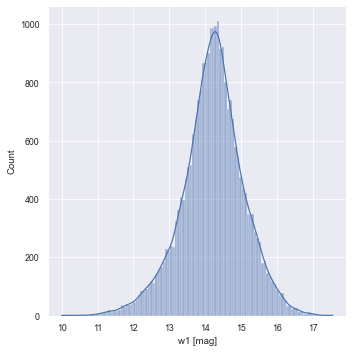

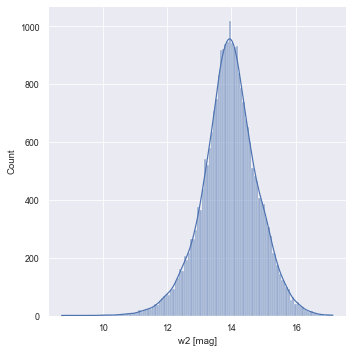

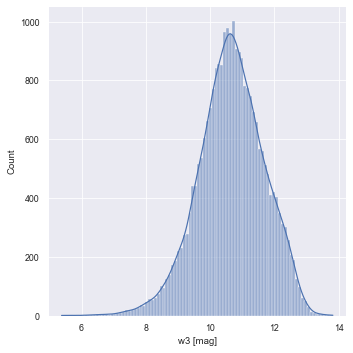

In [120]:
cols = ['w1', 'w2', 'w3']

for col in cols:
    sns.displot(data=wise_sub, x=col, log_scale=False, kde=True)

    plt.xlabel(col + r' [mag]')

    #plt.savefig('./wise_data_histograms/distr_' + col + '.pdf')

    plt.show()

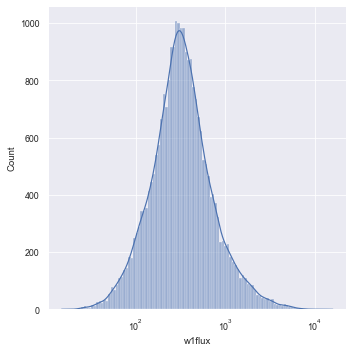

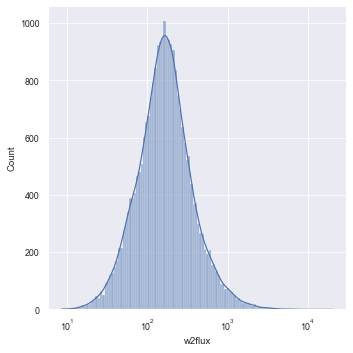

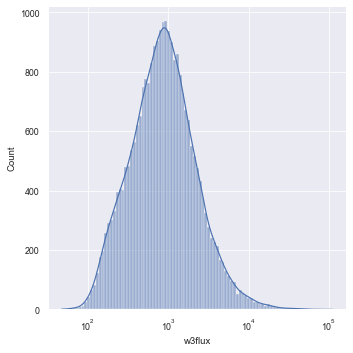

In [121]:
cols = ['w1flux', 'w2flux', 'w3flux']

for col in cols:
    sns.displot(data=wise_sub, x=col, log_scale=True, kde=True)

    plt.xlabel(col)

    # plt.savefig('./wise_data_histograms/distr_' + col + '.pdf')

    plt.show()

## WISE Labels

In [265]:
def wise_color_color(w1, w2, w3):
    '''
    Returns the class according to Figure 11b in Jarret et al. 2017
    '''
    color_x = w2 - w3
    color_y = w1 - w2

    if color_y >= 0.8:
        return 'AGN & (u)LIRGs'
    elif color_y < 0.8 and color_x < 2.0:
        return 'Spheroids'
    elif color_y < 0.8 and color_x > 3.5:
        return 'SF Disks'
    else:
        return 'Inter. Disks'

In [266]:
wise_sub['wise class'] = wise_sub.apply(lambda x: wise_color_color(x['w1'], x['w2'], x['w3']), axis=1)
Counter(wise_sub['wise class'])

Counter({'SF Disks': 11942,
         'Inter. Disks': 11041,
         'Spheroids': 2009,
         'AGN & (u)LIRGs': 507})

In [267]:
wise_sub['w1-w2'] = wise_sub.apply(lambda x: x['w1'] - x['w2'], axis=1)
wise_sub['w2-w3'] = wise_sub.apply(lambda x: x['w2'] - x['w3'], axis=1)

# 3.4 um = W1
# 4.6 um = W2
# 12  um = W3
wise_sub['flux2/flux1'] = wise_sub.apply(lambda x: x['w2flux'] / x['w1flux'], axis=1)
wise_sub['flux2/flux1_log'] = wise_sub.apply(lambda x: np.log10(x['flux2/flux1']), axis=1)
wise_sub['flux3/flux2'] = wise_sub.apply(lambda x: x['w3flux'] / x['w2flux'], axis=1)
wise_sub['flux3/flux2_log'] = wise_sub.apply(lambda x: np.log10(x['flux3/flux2']), axis=1)

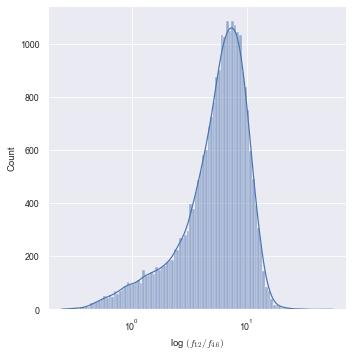

In [125]:
sns.displot(data=wise_sub, x='flux3/flux2', log_scale=True, kde=True)
plt.xlabel(r'log $ \left ( f_{12} / f_{4.6} \right ) $')

# plt.savefig('./wise_data_histograms/distr_flux3_flux2.pdf')

plt.show()

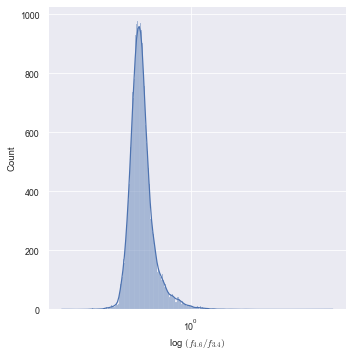

In [126]:
sns.displot(data=wise_sub, x='flux2/flux1', log_scale=True, kde=True)
plt.xlabel(r'log $ \left ( f_{4.6} / f_{3.4} \right ) $')

# plt.savefig('./wise_data_histograms/distr_flux2_flux1.pdf')

plt.show()

## Color-Color Diagram

In [268]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.ylim(-1.1, 2.4)
plt.xlim(-0.5, 6.2)

sns.scatterplot(data=wise_sub, x='w2-w3', y='w1-w2', palette='colorblind', 
                hue='wise class', style='wise class', size='wise class', sizes=(70, 20))

sns.kdeplot(data=wise_sub, x='w2-w3', y='w1-w2', levels=5, alpha=0.7, cut=2, color='k', log_scale=False)

plt.vlines([2.0, 3.5], -1.1, 0.8, 
           linestyles='dashdot', color='k', alpha=0.7, linewidth=1.7)
plt.hlines(0.8, -0.5, 6.2, linestyles='dashdot', color='k', alpha=0.7, linewidth=1.7)

props = dict(boxstyle='round', color='#d55e00', alpha=0.8)
ax.text(0.8, 0.9, 'AGN & (u)LIRGs', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props, color='white')

props_1 = dict(boxstyle='round', color='#de8f05', alpha=0.8)
ax.text(0.41, 0.1, 'Intermediate Disks', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props_1, color='white')

props_2 = dict(boxstyle='round', color='#029e73', alpha=0.8)
ax.text(0.15, 0.1, 'Spheroids', transform=ax.transAxes, fontsize=11,
       verticalalignment='top', bbox=props_2, color='white')

props_3 = dict(boxstyle='round', color='#0173b2', alpha=0.9)
ax.text(0.8, 0.1, 'SF Disks', transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props_3, color='white')

plt.xlabel(r'W2 - W3 [mag]', fontsize=13)
plt.ylabel(r'W1 - W2 [mag]', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

# plt.savefig('./WISE_plots/wise_color_color.pdf')

plt.show()

## Fluxes Diagram

In [278]:
def wise_label_Mateos(fluxw1, fluxw2, fluxw3):
    '''
    Returns the class according to Figure 11b in Jarret et al. 2017
    '''
    flux_x = np.log10(fluxw3 / fluxw2)
    flux_y = np.log10(fluxw2 / fluxw1)

    if (flux_y >= -3.172 * flux_x + 0.436) and (flux_y <= 0.315 * flux_x + 0.297) and (flux_y >= 0.315 * flux_x - 0.110):
        return 'X-ray AGN'
    else:
        return 'Other'

### Fluxes: DN to Janskys

In [270]:
def DN_to_Jy(flux_dn, color):
    '''Given a flux in [Digital Numbers] and it's magnitude, 
    this return the flux in Janskys'''
    return flux_dn * 10**(- color / 2.5)

In [271]:
wise_sub['w1flux_Jy'] = wise_sub.apply(lambda x: DN_to_Jy(x['w1flux'], x['w1']), axis=1)
wise_sub['w2flux_Jy'] = wise_sub.apply(lambda x: DN_to_Jy(x['w2flux'], x['w2']), axis=1)
wise_sub['w3flux_Jy'] = wise_sub.apply(lambda x: DN_to_Jy(x['w3flux'], x['w3']), axis=1)

In [272]:
wise_sub['flux2/flux1_Jy'] = wise_sub.apply(lambda x: x['w2flux_Jy'] / x['w1flux_Jy'], axis=1)
wise_sub['flux2/flux1_Jy_log'] = wise_sub.apply(lambda x: np.log10(x['flux2/flux1_Jy']), axis=1)
wise_sub['flux3/flux2_Jy'] = wise_sub.apply(lambda x: x['w3flux_Jy'] / x['w2flux_Jy'], axis=1)
wise_sub['flux3/flux2_Jy_log'] = wise_sub.apply(lambda x: np.log10(x['flux3/flux2_Jy']), axis=1)

In [279]:
wise_sub['wise Mateos label DN'] = wise_sub.apply(lambda x: wise_label_Mateos(x['w1flux'], x['w2flux'], x['w3flux']), axis=1)
wise_sub['wise Mateos label'] = wise_sub.apply(lambda x: wise_label_Mateos(x['w1flux_Jy'], x['w2flux_Jy'], x['w3flux_Jy']), axis=1)

In [280]:
Counter(wise_sub['wise Mateos label DN'])

Counter({'Other': 25460, 'X-ray AGN': 39})

In [281]:
Counter(wise_sub['wise Mateos label'])

Counter({'Other': 25434, 'X-ray AGN': 65})

In [284]:
Counter(wise_sub.loc[wise_sub['wise Mateos label']=='X-ray AGN']['wise class'])

Counter({'AGN & (u)LIRGs': 64, 'Spheroids': 1})

In [286]:
wise_sub['final_wise_label'] = wise_sub['wise class']
wise_sub.loc[wise_sub['wise Mateos label']=='X-ray AGN', 'final_wise_label'] = wise_sub['wise Mateos label']
Counter(wise_sub['final_wise_label'])

Counter({'SF Disks': 11942,
         'Inter. Disks': 11041,
         'Spheroids': 2008,
         'AGN & (u)LIRGs': 443,
         'X-ray AGN': 65})

In [290]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(data=wise_sub, x='flux3/flux2_Jy_log', y='flux2/flux1_Jy_log', palette='colorblind', 
               hue='wise Mateos label', style='wise Mateos label', size='wise Mateos label', sizes=(30, 15))

sns.kdeplot(data=wise_sub, x='flux3/flux2_Jy_log', y='flux2/flux1_Jy_log', 
            levels=5, alpha=0.7, cut=2, color='k', log_scale=False)

plt.xlim(-0.8, 4.3)
# plt.ylim(-0.85, 0.6)

x_to_plot = np.linspace((0.436 - 0.297) / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot, 0.315 * x_to_plot + 0.297, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

x_to_plot_1 = np.linspace((0.436 + 0.110) / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot_1, 0.315 * x_to_plot_1 - 0.110, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

x_to_plot_2 = np.linspace(0.436 / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot_2, 0.315 * x_to_plot_2, linewidth=1.2, alpha=0.8, c='k', linestyle='dotted')

x_to_plot_3 = np.linspace((0.436 - 0.297) / (3.172 + 0.315), (0.436 + 0.110) / (3.172 + 0.315), 50)
plt.plot(x_to_plot_3, - 3.172 * x_to_plot_3 + 0.436, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

plt.xlabel(r'log $ \left ( f_{12} / f_{4.6} \right ) $', fontsize=13)
plt.ylabel(r'log $ \left ( f_{4.6} / f_{3.4} \right ) $', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

# plt.savefig('./WISE_plots/wise_fluxes_Mateos_label.pdf')

plt.show()

In [291]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(data=wise_sub, x='flux3/flux2_Jy_log', y='flux2/flux1_Jy_log', palette='colorblind', 
               hue='BPT final', style='BPT final', size='BPT final', sizes=(30, 15))

sns.kdeplot(data=wise_sub,x='flux3/flux2_Jy_log', y='flux2/flux1_Jy_log', 
            levels=5, alpha=0.7, cut=2, color='k', log_scale=False)

plt.xlim(-0.8, 4.3)
# plt.ylim(-0.85, 0.6)

x_to_plot = np.linspace((0.436 - 0.297) / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot, 0.315 * x_to_plot + 0.297, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

x_to_plot_1 = np.linspace((0.436 + 0.110) / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot_1, 0.315 * x_to_plot_1 - 0.110, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

x_to_plot_2 = np.linspace(0.436 / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot_2, 0.315 * x_to_plot_2, linewidth=1.2, alpha=0.8, c='k', linestyle='dotted')

x_to_plot_3 = np.linspace((0.436 - 0.297) / (3.172 + 0.315), (0.436 + 0.110) / (3.172 + 0.315), 50)
plt.plot(x_to_plot_3, - 3.172 * x_to_plot_3 + 0.436, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

plt.xlabel(r'log $ \left ( f_{12} / f_{4.6} \right ) $', fontsize=13)
plt.ylabel(r'log $ \left ( f_{4.6} / f_{3.4} \right ) $', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

# plt.savefig('./WISE_plots/wise_fluxes_BPT_label.pdf')

plt.show()

In [375]:
print(wise_sub[['w1', 'w2', 'w3', 'w1flux_Jy', 'w2flux_Jy', 
          'w3flux_Jy']].describe().to_latex(#'./final_project_report/wise_subsample_describe.tex', 
                                        float_format="{:.4f}".format))

\begin{tabular}{lrrrrrr}
\toprule
{} &         w1 &         w2 &         w3 &  w1flux\_Jy &  w2flux\_Jy &  w3flux\_Jy \\
\midrule
count & 25499.0000 & 25499.0000 & 25499.0000 & 25499.0000 & 25499.0000 & 25499.0000 \\
mean  &    14.2113 &    13.9518 &    10.6599 &     0.0034 &     0.0025 &     0.4763 \\
std   &     0.8648 &     0.8623 &     1.0157 &     0.0212 &     0.0471 &     6.8111 \\
min   &     9.9960 &     8.7270 &     5.3780 &     0.0000 &     0.0000 &     0.0001 \\
25\%   &    13.7230 &    13.4480 &    10.0230 &     0.0003 &     0.0002 &     0.0133 \\
50\%   &    14.2400 &    13.9610 &    10.6720 &     0.0006 &     0.0004 &     0.0460 \\
75\%   &    14.7400 &    14.4890 &    11.3450 &     0.0017 &     0.0011 &     0.1519 \\
max   &    17.5650 &    17.1610 &    13.8200 &     1.5961 &     6.5846 &   789.6525 \\
\bottomrule
\end{tabular}



## All color-color labels

In [368]:
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [370]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(data=wise_sub, x='flux3/flux2_Jy_log', y='flux2/flux1_Jy_log', palette='colorblind', 
               hue='final_wise_label', style='final_wise_label', size='final_wise_label', sizes=(30, 15))

sns.kdeplot(data=wise_sub, x='flux3/flux2_Jy_log', y='flux2/flux1_Jy_log', 
            levels=5, alpha=0.7, cut=2, color='k', log_scale=False)

x_to_plot = np.linspace((0.436 - 0.297) / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot, 0.315 * x_to_plot + 0.297, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

x_to_plot_1 = np.linspace((0.436 + 0.110) / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot_1, 0.315 * x_to_plot_1 - 0.110, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

x_to_plot_2 = np.linspace(0.436 / (3.172 + 0.315), 4.3, 50)
plt.plot(x_to_plot_2, 0.315 * x_to_plot_2, linewidth=1.2, alpha=0.8, c='k', linestyle='dotted')

x_to_plot_3 = np.linspace((0.436 - 0.297) / (3.172 + 0.315), (0.436 + 0.110) / (3.172 + 0.315), 50)
plt.plot(x_to_plot_3, - 3.172 * x_to_plot_3 + 0.436, linewidth=1.2, alpha=0.8, c='k', linestyle='solid')

plt.xlabel(r'log $ \left ( f_{12} / f_{4.6} \right ) $', fontsize=13)
plt.ylabel(r'log $ \left ( f_{4.6} / f_{3.4} \right ) $', fontsize=13)

plt.legend(loc='upper left', fontsize=11)

# plt.savefig('./WISE_plots/wise_final_label.pdf')

plt.show()

## On top of Fig. 12 Wright et al. 2010

In [321]:
fig = plt.figure(figsize=(522*2/120, 573*2/120), dpi=120)

img = plt.imread('./WISE_plots/Fig12_Wright_2010.jpg')

plt.imshow(img, zorder=1, extent=[-1.01, 7, -0.5, 4], aspect='equal', alpha=0.5)

sns.kdeplot(data=wise_sub, x='w2-w3', y='w1-w2', levels=7, alpha=1.0, cut=2, color='mediumblue', zorder=5)

# plt.savefig('./WISE_plots/color_color_top_Wright.pdf')

plt.show()

## Inspecting labels

In [322]:
wise_sub.columns

Index(['specobjid_1', 'plate_1', 'mjd_1', 'fiberID_1', 'ra_1', 'dec_1',
       'class', 'subclass_1', 'z_1', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'h_alpha_flux', 'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err',
       'nii_6584_flux', 'nii_6584_flux_err', 'nii_6584_reqw',
       'nii_6584_reqw_err', 'sii_6717_flux', 'sii_6717_flux_err',
       'sii_6731_flux', 'sii_6731_flux_err', 'oi_6300_flux',
       'oi_6300_flux_err', 'h_alpha_reqw', 'h_alpha_reqw_err',
       'neiii_3869_flux', 'neiii_3869_flux_err', 'oii_3726_flux',
       'oii_3726_flux_err', 'oii_3729_flux', 'oii_3729_flux_err', 'psfMag_g',
       'psfMagErr_g', 'psfMag_z', 'psfMagErr_z', 'specobjid_2', 'plate_2',
       'mjd_2', 'fiberID_2', 'ra_2', 'dec_2', 'subclass_2', 'z_2', 'w1', 'w2',
       'w3', 'w1sigmpro', 'w2sigmpro', 'w3sigmpro', 'w1flux', 'w2flux',
       'w3flux', 'w1sigflux', 'w2sigflux', 'w3sigflux', 'Separation',
       'nii_h_alpha', 'nii_h_alpha_log', 'oiii_h_beta', 'oiii_h_beta_log',
       

In [323]:
Counter(wise_sub['class'])

Counter({'GALAXY': 25061, 'QSO': 438})

In [331]:
for i in Counter(wise_sub['class']):
    print(i, Counter(wise_sub['class'])[i], 
    Counter(wise_sub['class'])[i] * 100 / wise_sub.shape[0])

GALAXY 25061 98.28228557982666
QSO 438 1.71771442017334


In [324]:
Counter(wise_sub['subclass_1'])

Counter({'STARBURST': 5431,
         'STARFORMING': 12883,
         nan: 4519,
         'AGN': 1617,
         'BROADLINE': 472,
         'AGN BROADLINE': 274,
         'STARFORMING BROADLINE': 98,
         'STARBURST BROADLINE': 205})

In [325]:
Counter(wise_sub['BPT final'])

Counter({'Star Forming': 16060, 'Composite': 4970, 'AGN': 4469})

In [330]:
for i in Counter(wise_sub['BPT final']):
    print(i, Counter(wise_sub['BPT final'])[i], 
    Counter(wise_sub['BPT final'])[i] * 100 / wise_sub.shape[0])

Star Forming 16060 62.982862073022474
Composite 4970 19.490960429820777
AGN 4469 17.526177497156752


In [326]:
Counter(wise_sub['final_wise_label'])

Counter({'SF Disks': 11942,
         'Inter. Disks': 11041,
         'Spheroids': 2008,
         'AGN & (u)LIRGs': 443,
         'X-ray AGN': 65})

In [347]:
for i in Counter(wise_sub['final_wise_label']):
    print(i, Counter(wise_sub['final_wise_label'])[i], 
    Counter(wise_sub['final_wise_label'])[i] * 100 / wise_sub.shape[0])

SF Disks 11942 46.833209145456685
Inter. Disks 11041 43.29973724459783
Spheroids 2008 7.874818620338052
AGN & (u)LIRGs 443 1.7373230322757756
X-ray AGN 65 0.25491195733166006


In [365]:
Counter(wise_sub.loc[wise_sub['BPT final']=='AGN']['final_wise_label'])

Counter({'Inter. Disks': 2352,
         'Spheroids': 1549,
         'SF Disks': 294,
         'AGN & (u)LIRGs': 224,
         'X-ray AGN': 50})

## AGN by both

In [355]:
wise_sub_agn = wise_sub.loc[wise_sub['BPT final']=='AGN']
wise_sub_agn = wise_sub_agn.loc[wise_sub_agn['final_wise_label']=='AGN & (u)LIRGs']
wise_sub_agn = pd.concat([wise_sub_agn, wise_sub.loc[wise_sub['final_wise_label']=='X-ray AGN']], axis=0)
wise_sub_agn.shape

(289, 82)

## Pie Charts

In [360]:
plt.figure(figsize=(7, 7))

wise_sub.loc[wise_sub['BPT final']=='AGN'].groupby('final_wise_label').size().plot(kind='pie', autopct='%.2f', labels=None, 
                                                                            textprops={'fontsize': 14}, 
                                                                            colors=['#0173b2', '#de8f05', '#029e73', 
                                                                            '#d55e00', '#cc78bc'], 
                                                                            legend=True)

plt.title('WISE Label', fontsize=14)
plt.ylabel(None)

# plt.savefig('./WISE_plots/wise_label_pie_wise_subsample.pdf')

plt.show()

In [362]:
plt.figure(figsize=(7, 7))

wise_only_agn = wise_sub.loc[wise_sub['final_wise_label']=='AGN & (u)LIRGs']
wise_only_agn = pd.concat([wise_only_agn, wise_sub.loc[wise_sub['final_wise_label']=='X-ray AGN']], axis=0)

wise_only_agn.groupby('BPT final').size().plot(kind='pie', autopct='%.2f', labels=None, 
                                                                            textprops={'fontsize': 14}, 
                                                                            colors=['#0173b2', '#de8f05', '#029e73'], 
                                                                            legend=True)

plt.title('BPT Label', fontsize=14)
plt.ylabel(None)

# plt.savefig('./WISE_plots/bpt_label_pie_wise_subsample.pdf')

plt.show()

In [364]:
Counter(wise_only_agn['BPT final'])

Counter({'AGN': 274, 'Star Forming': 146, 'Composite': 88})

In [141]:
# wise_sub.to_csv('./wise_subsample.csv', index=False)